In [1]:
# Imports
import os
import time
import datetime

import torch 
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as VF
from torchvision.utils import save_image
from fastai.vision.gan import basic_generator, basic_critic, gan_critic

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# batch size
batch_size = 1
root = 'painting_data'

# transform
transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        ])

# create dataset from images in ImageFolder
data = torchvision.datasets.ImageFolder(root=root, transform=transform)

# create dataloader for data
dataloader = torch.utils.data.DataLoader(data, shuffle=True, batch_size = batch_size)

In [3]:
# print out info on data and dataloader
print(data)
print(dataloader)

Dataset ImageFolder
    Number of datapoints: 8683
    Root location: painting_data


torch.Size([1, 3, 64, 64])
(64, 64, 3)


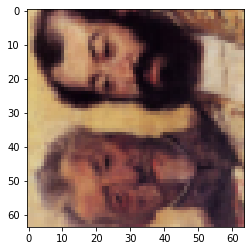

In [4]:
# visualizing data

# def imshow(imgs):
#     imgs = torchvision.utils.make_grid(imgs)
#     print(imgs.shape)
#     npimgs = imgs.numpy()
#     print(npimgs.shape)
#     print(npimgs)
#     plt.figure(figsize=(8,8))
#     plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
#     plt.xticks([])
#     plt.yticks([])
#     plt.show
    
dataIter = iter(dataloader)

imgs, labels = dataIter.next()

print(imgs.shape)

imgs = imgs.numpy().squeeze(0)
imgs = np.transpose(imgs, (2,1,0))

print(imgs.shape)

plt.imshow(imgs, cmap='gray')

# imgs = VF.to_pil_image(imgs)

# display(imgs)


In [5]:
# network parameters

channels = 3
pixels = 64
fc_dim = int(pixels * pixels)


In [6]:
Discriminator_conv = gan_critic(nf=64)


Generator_conv = basic_generator(in_size=64,
                                n_channels=3,
                                noise_sz=fc_dim
                                )
print(Generator_conv)
print(Discriminator_conv)

Sequential(
  (0): Sequential(
    (0): ConvTranspose2d(4096, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (4): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padd

In [7]:
print(imgs.shape)


# testing
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
noise = torch.randn(batch_size, fc_dim, 1, 1).to(device)
print(noise.shape)
Generator_conv.to(device)
Discriminator_conv.to(device)
Generator_fake = Generator_conv(noise)
print(Generator_fake.shape)
D_fake = torch.sigmoid(Discriminator_conv(Generator_fake))
print(D_fake.shape)

(64, 64, 3)
torch.Size([1, 4096, 1, 1])
torch.Size([1, 3, 64, 64])
torch.Size([1, 1])


In [8]:
# define loss function
adversarial_loss = torch.nn.BCELoss()

# define lr
lr = 0.002

# define new optimizers
gen_opt = opt.Adam(Generator_conv.parameters(), lr=lr, betas=(0.5,0.999))
dis_opt = opt.Adam(Discriminator_conv.parameters(), lr=lr, betas=(0.5, 0.999))

In [9]:
# train on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Generator_conv.to(device)
Discriminator_conv.to(device)
adversarial_loss.to(device)


BCELoss()

In [10]:
# define save directories for DCGAN
root = 'DCGAN_models/'
gen_model = 'DCGAN_generator_param.pth'
critic_model = 'DCGAN_critic_param.pth'

if not os.path.isdir(root):
    os.mkdir(root)

Sequential(
  (0): Sequential(
    (0): ConvTranspose2d(4096, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (4): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padd

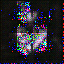

Epoch:1/8683, G_loss:2.25, D_loss:0.65, Time:0:00:19.427335


KeyboardInterrupt: 

In [11]:
# training

n_epochs = 501
sample_interval = 500

time_elapsed = 0

# make image directory

os.makedirs("DCGAN_Output", exist_ok=True)

# training loop
print(Generator_conv)
print(Discriminator_conv)
    
for i, data in enumerate(dataloader):
        
    G_loss_run = 0
    D_loss_run = 0
    
    start = time.time()
    
    for epoch in range(n_epochs):
        
        # define running losses 
        G_loss_run = 0
        D_loss_run = 0



        #train w/ real
        dis_opt.zero_grad()
        X, _ = data
        X = X.to(device)
        mb_size = X.size(0)

        one_labels = torch.ones(mb_size, 1).to(device)
        zero_labels = torch.zeros(mb_size, 1).to(device)


        # D loss
        D_real = torch.sigmoid(Discriminator_conv(X))
        D_real_loss = adversarial_loss(D_real, one_labels)
        D_real_loss.backward()

        #train w/ fake
        # noise
        z = torch.randn(mb_size, fc_dim, 1, 1).to(device)
        D_fake = torch.sigmoid(Discriminator_conv(Generator_conv(z)))
        D_fake_loss = adversarial_loss(D_fake, zero_labels)
        D_fake_loss.backward()
        D_loss = D_real_loss + D_fake_loss


        # D backprop
        dis_opt.step()

        # update G
        gen_opt.zero_grad()
        # G loss
        z = torch.randn(mb_size, fc_dim,1,1).to(device)

        # generate images
        gen_imgs = Generator_conv(z)

        G_loss = adversarial_loss(torch.sigmoid(Discriminator_conv(gen_imgs)), one_labels)

        # G backprop
        G_loss.backward()
        gen_opt.step()

        # calculate running losses
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
    end = time.time()
    time_elapsed += end-start
    
    samples = Generator_conv(z).detach()
    samples = samples.view(samples.size(0), channels, pixels, pixels).cpu()
    samples = samples.squeeze(0)
    display(VF.to_pil_image(samples)) 
    
    
    print(f'Epoch:{i+1}/{len(dataloader)}, G_loss:{G_loss_run/(i+1):.2f}, D_loss:{D_loss_run/(i+1):.2f}, Time:{datetime.timedelta(seconds=time_elapsed)}')

    
# optional save outputs    
#     if i % 1 == 0:
#         save_image(samples, "DCGAN_Output/%d.png" % int(i+1), nrow=8, normalize=True)
 
# optional save model   
# print('Saving Generator & Critic')
# torch.save(Generator_conv.state_dict(), root + critic_model)
# torch.save(Discriminator_conv.state_dict(), root + gen_model)
# print('done')
        

In [ ]:
# check if models saved properly
!ls DCGAN_models